# API Call to Articles API for Technologist Popularity 

In [2]:
import requests
from bs4 import BeautifulSoup
import json
import glob
import os
import re
import datetime
import string
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from textblob import TextBlob
import operator 

In [8]:
os.getcwd()

'C:\\Users\\Jay Padhya\\Documents\\A_Midterm'

In [2]:
requestdatajson = requests.get("http://api.nytimes.com/svc/search/v2/articlesearch.json?query=begin_date=19940101&end_date=19960101&api-key=ad7cc4f2ca2d4c518eb2d88b3e768657")
data = requestdatajson.json()
beautifuldata = requestdatajson.content
with open('article_value_response.json', 'w') as outfile:
    json.dump(data, outfile)
#data 

In [10]:
files=glob.glob('apicall/article/*')
articles=[]
for file in files:
    with open(file) as data_file:    
        data = json.load(data_file)
        x=data['response']['docs']

#print(str(len(x))) 7414 articles 

In [41]:
#soup = BeautifulSoup(beautifuldata,"json_parser") This is used for beautiful soup

In [11]:
redsoxArticles = []
zuckerbergArticles = []
gatesArticles = []
for article in x:
    text = ''
    if article.get('headline').get('main') :
        text = (article.get('headline').get('main')).lower()
    zuckerbergCount = [word for word in text.split() if word in ['zuckerberg', 'mark']]
    gatesCount = [word for word in text.split() if word in ['gates','bill']]
    if len(zuckerbergCount) > len(gatesCount):
        zuckerbergArticles.append(article)
    elif len(zuckerbergCount) < len(gatesCount):
        gatesArticles.append(article)

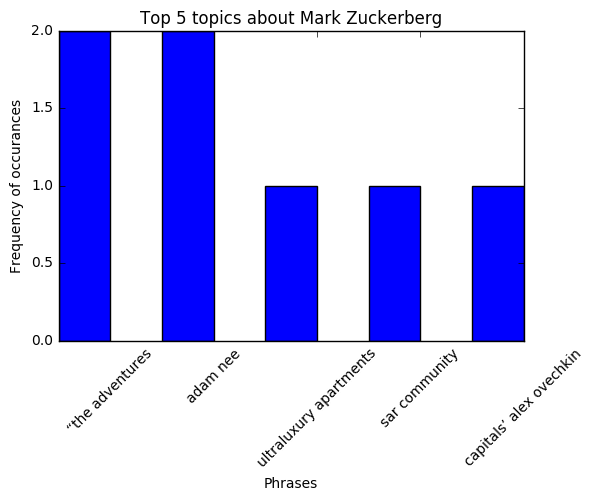

In [8]:
names = ['zuckerberg', 'mark', 'gates','bill', 'technology']
text1=''
for article in zuckerbergArticles:
    if article.get('headline').get('main') :
        text1 = text1 + (article.get('headline').get('main')).lower()
    if article.get("lead_paragraph") :
        text1 = text1 + (article.get("lead_paragraph")).lower()
    if article.get("abstract") :
        text1 = text1 + (article.get("abstract")).lower()
blob = TextBlob(text1)
filtered_words = [phrase for phrase in blob.noun_phrases if not any(word in names for word in phrase.split())]
import numpy as np
sortedDict = sorted(dict(Counter(filtered_words)).items(), key=operator.itemgetter(1), reverse = 1) # sorting wordlist dictionary by value#             
y = [val for key, val in sortedDict][:5]
labels = [key for key, val in sortedDict][:5]
N = len(y)
x = np.arange(1, N+1)
width = 0.5
plt.bar(x, y, width)
plt.ylabel('Frequency of occurances')
plt.xlabel('Phrases')
plt.title('Top 5 topics about Mark Zuckerberg' )
plt.xticks(x + width/1.0, labels)
plt.xticks(rotation=45)
plt.show()

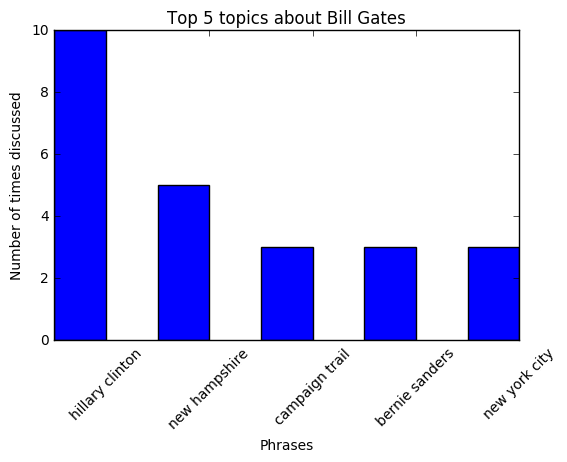

In [9]:
names = ['zuckerberg', 'mark', 'gates','bill', 'technology']
text2=''
for article in gatesArticles:
    if article.get('headline').get('main') :
        text2 = text2 + (article.get('headline').get('main')).lower()
    if article.get("lead_paragraph") :
        text2 = text2 + (article.get("lead_paragraph")).lower()
    if article.get("abstract") :
        text2 = text2 + (article.get("abstract")).lower()
blob = TextBlob(text2)
filtered_words = [phrase for phrase in blob.noun_phrases if not any(word in names for word in phrase.split())]
sortedDict = sorted(dict(Counter(filtered_words)).items(), key=operator.itemgetter(1), reverse = 1) # sorting wordlist dictionary by value
y = [val for key, val in sortedDict][:5]
labels = [key for key, val in sortedDict][:5]
N = len(y)
x = np.arange(1, N+1)
width = 0.5
plt.bar(x, y, width)
plt.ylabel('Number of times discussed')
plt.xlabel('Phrases')
plt.title('Top 5 topics about Bill Gates')
plt.xticks(x + width/1.0, labels)
plt.xticks(rotation=45)
plt.show()

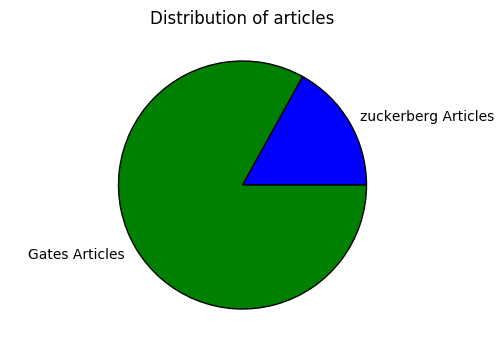

In [10]:
sums = [len(zuckerbergArticles), len(gatesArticles)]
plt.axis('equal');
plt.pie(sums, labels=['zuckerberg Articles', 'Gates Articles'])
plt.title('Distribution of articles')
plt.show()

# Inference : We can conclude that when technologists like Bill Gates and Mark Zuckerberg speak on various issues, their popularity depends on which topics they are covering. In our case, Zuckerberg spoke more on community imporvements and Bill Gates spoke more on Politics. Bill gates gained due popularity indicating that NYTimes writes more on politics over community improvements.  